In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the file
data_last = pd.read_csv('data_last.csv')
data_mkt_cap = pd.read_csv('data_mkt_cap.csv')
data_sector = pd.read_csv('data_sector.csv')
data_volume = pd.read_csv('data_volume.csv')

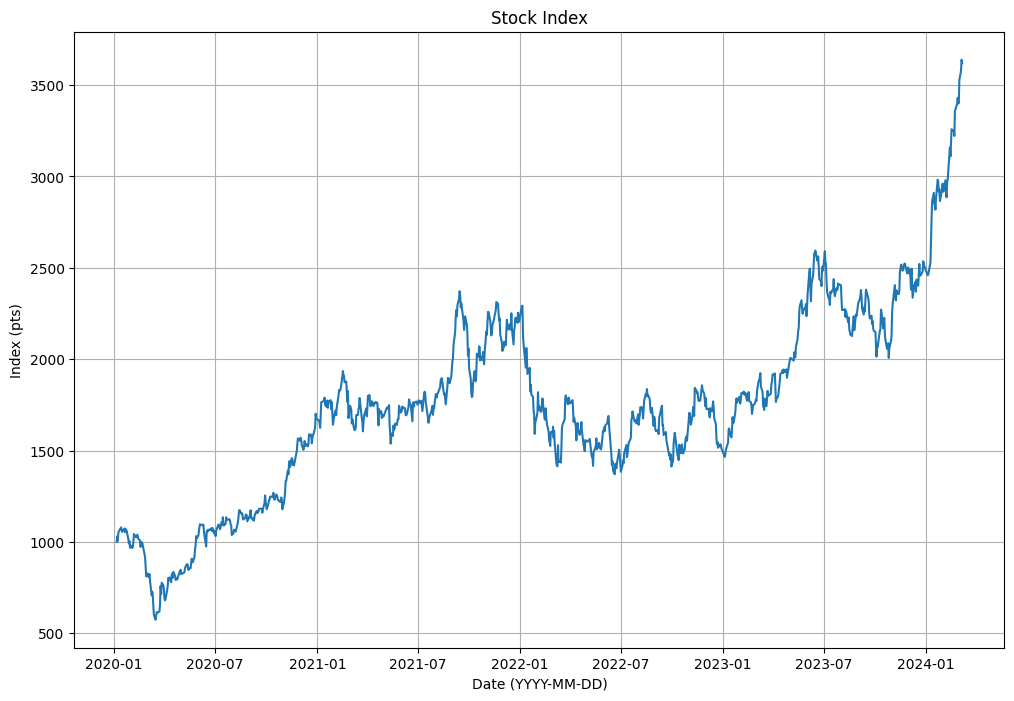

In [110]:
# Task 1: Compose a stock index using market cap weight, set it to 1000 point on 2020-01-06, and make a line plot

def compose_index(data_last, data_mkt_cap, base_date, base_index):
    data_last['date'] = pd.to_datetime(data_last['date'])
    data_mkt_cap['date'] = pd.to_datetime(data_mkt_cap['date'])

    # Select the data after the base date
    data_last = data_last[data_last['date'] >= base_date]
    data_mkt_cap = data_mkt_cap[data_mkt_cap['date'] >= base_date]

    # Merge the data based on the ticker and date
    data = pd.merge(data_mkt_cap, data_last, on=['ticker', 'date'])

    # Calculate the market cap weight
    data['mkt_cap_weight'] = data['mkt_cap'] / data['mkt_cap'].sum()

    # Calculate the index value for each stock
    data['index_value'] = data['mkt_cap_weight'] * data['last']

    # Aggregate the Index Value for each date
    data = data.groupby('date').agg({'index_value': 'sum'}).reset_index()

    # Normalize the index value to the base index
    index_start = data[data['date'] == base_date]['index_value'].values[0]
    data['index'] = base_index * data['index_value'] / index_start

    # Plot the index
    plt.figure(figsize=(12, 8))
    plt.plot(data['date'], data['index'])
    plt.title('Stock Index')
    plt.xlabel('Date (YYYY-MM-DD)')
    plt.ylabel('Index (pts)')
    plt.grid(True)
    plt.show()

compose_index(data_last, data_mkt_cap, '2020-01-06', 1000)


In [119]:
# Task 2: find out the top 5 index move contributor  (both positive and negative) of each day in 2021-01

def index_move_contributor(data_last, data_mkt_cap, start_date, end_date):

    # Filter the data based on the date range
    data_last = data_last[(data_last['date'] >= start_date) & (data_last['date'] <= end_date)]
    data_mkt_cap = data_mkt_cap[(data_mkt_cap['date'] >= start_date) & (data_mkt_cap['date'] <= end_date)]

    data = pd.merge(data_last, data_mkt_cap, on=['ticker', 'date'])

    # Calculate the Weighted Market Cap for each stock
    data['mkt_cap_weight'] = data['last'] * data['mkt_cap'] / data['mkt_cap'].sum()

    # Calculate Price Change of each stock
    data['price_change'] = data.groupby('ticker')['last'].pct_change()

    # Calculate the Index Movement of each stock using Capitalization-Weighted Index
    data['index_move'] = data['mkt_cap_weight'] * data['price_change']

    # Drop the NaN values
    data = data.dropna()

    # Print the top 5 positive and negative index move contributors for each date
    for date in data['date'].unique():
        top_contributor = data[data['date'] == date].nlargest(5, 'index_move')
        bottom_contributor = data[data['date'] == date].nsmallest(5, 'index_move')
        print(f'Top 5 Positive Index Move contributors on {date}:')
        print(top_contributor[['ticker', 'index_move']].to_string(index=False))
        print(f'Top 5 Negative Index Move contributors on {date}:')
        print(bottom_contributor[['ticker', 'index_move']].to_string(index=False))
        print('\n')

index_move_contributor(data_last, data_mkt_cap, '2020-12-30', '2021-01-31')


Top 5 Positive Index Move contributors on 2021-01-04 00:00:00:
 ticker  index_move
2413 JT    0.320154
6758 JT    0.201780
6594 JT    0.131409
7741 JT    0.125049
6273 JT    0.097244
Top 5 Negative Index Move contributors on 2021-01-04 00:00:00:
 ticker  index_move
6861 JT   -0.479893
9983 JT   -0.449143
8035 JT   -0.090886
9984 JT   -0.083467
4661 JT   -0.070116


Top 5 Positive Index Move contributors on 2021-01-05 00:00:00:
 ticker  index_move
6273 JT    0.354467
8035 JT    0.191684
6758 JT    0.183670
6594 JT    0.149603
9843 JT    0.101702
Top 5 Negative Index Move contributors on 2021-01-05 00:00:00:
 ticker  index_move
6861 JT   -0.942822
9983 JT   -0.579225
6367 JT   -0.209465
7741 JT   -0.147340
4519 JT   -0.100731


Top 5 Positive Index Move contributors on 2021-01-06 00:00:00:
 ticker  index_move
6273 JT    0.305287
9984 JT    0.172450
9843 JT    0.166466
8316 JT    0.053562
9433 JT    0.037191
Top 5 Negative Index Move contributors on 2021-01-06 00:00:00:
 ticker  index_mov

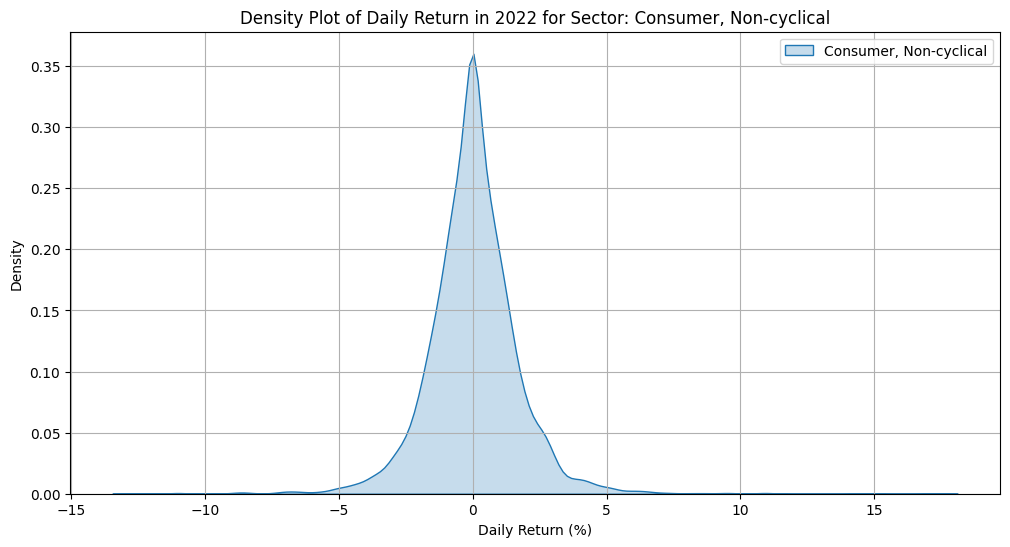

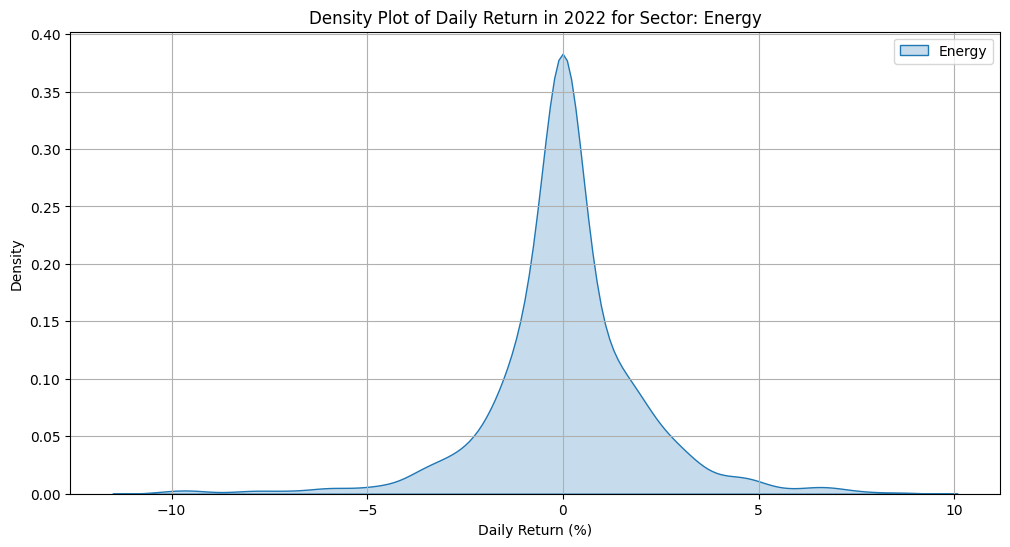

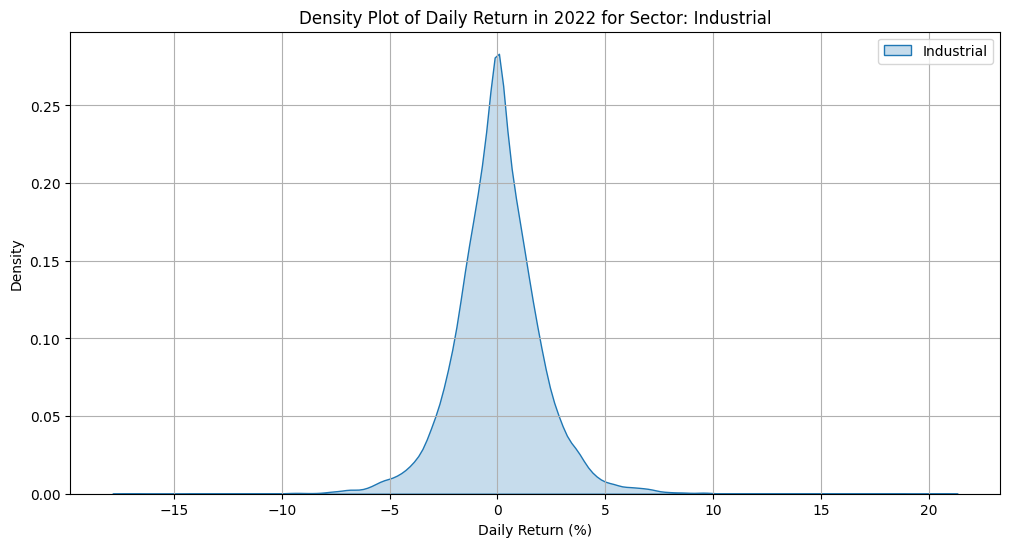

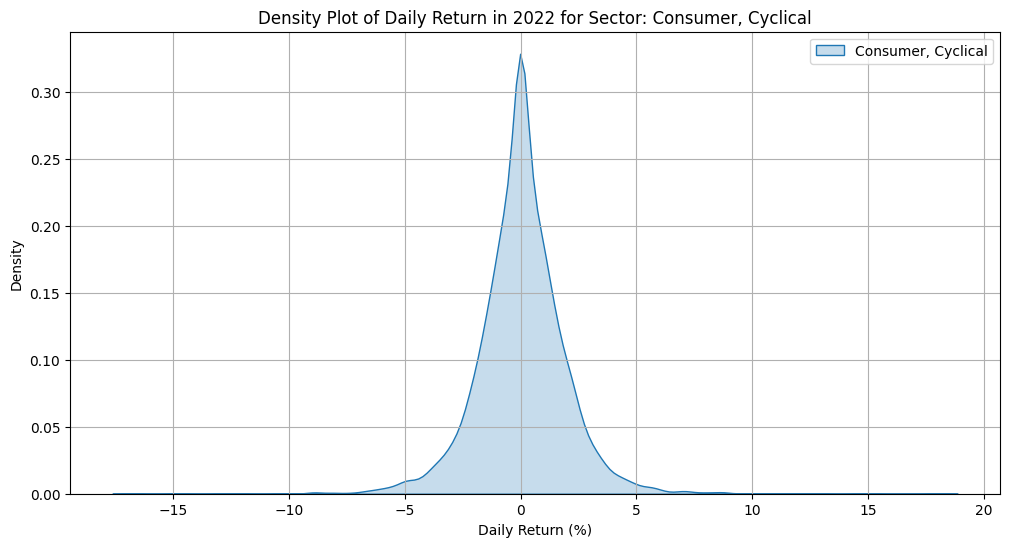

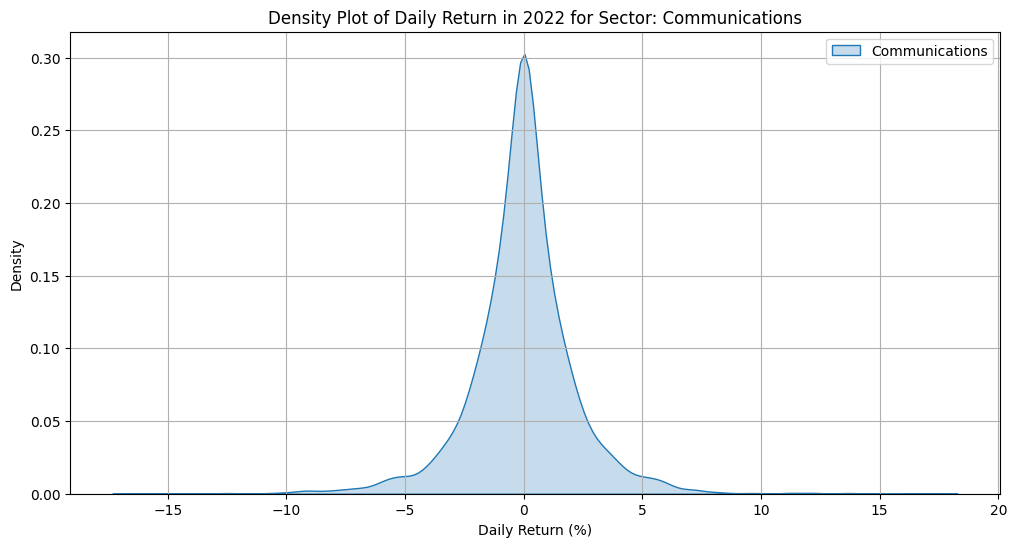

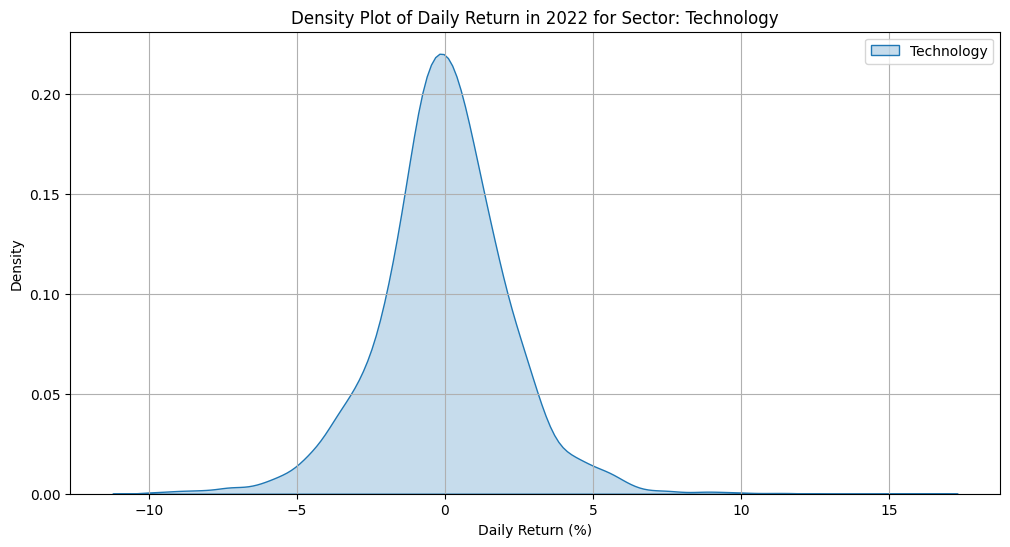

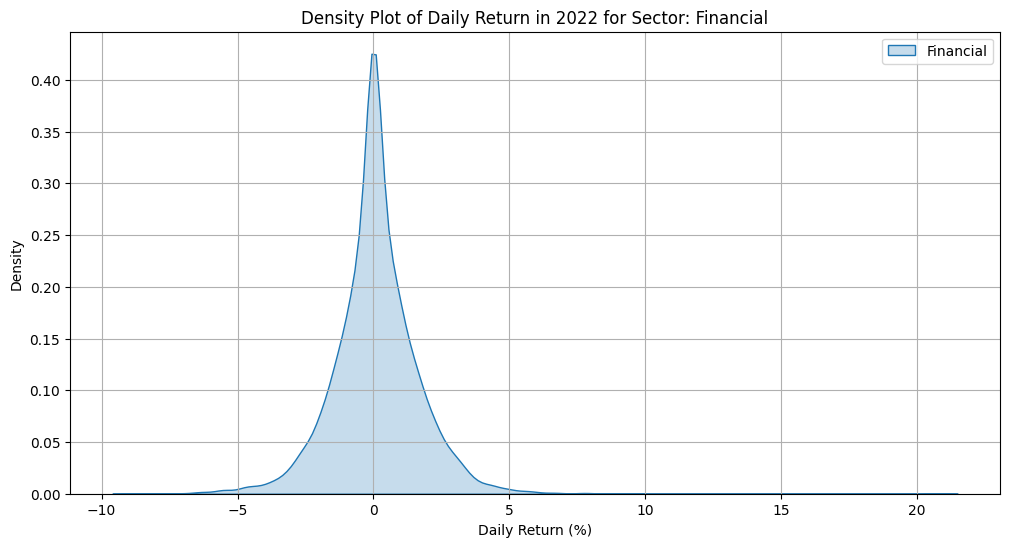

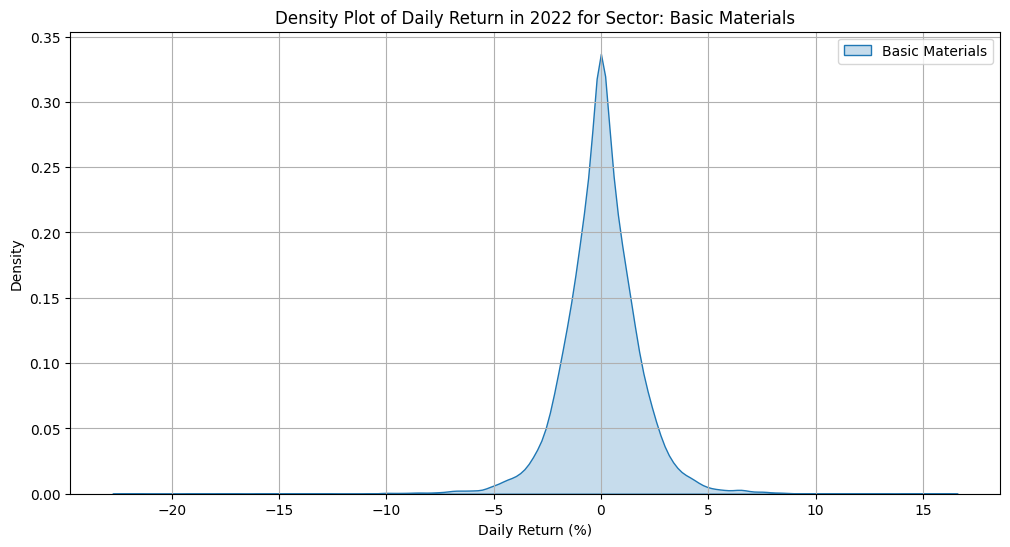

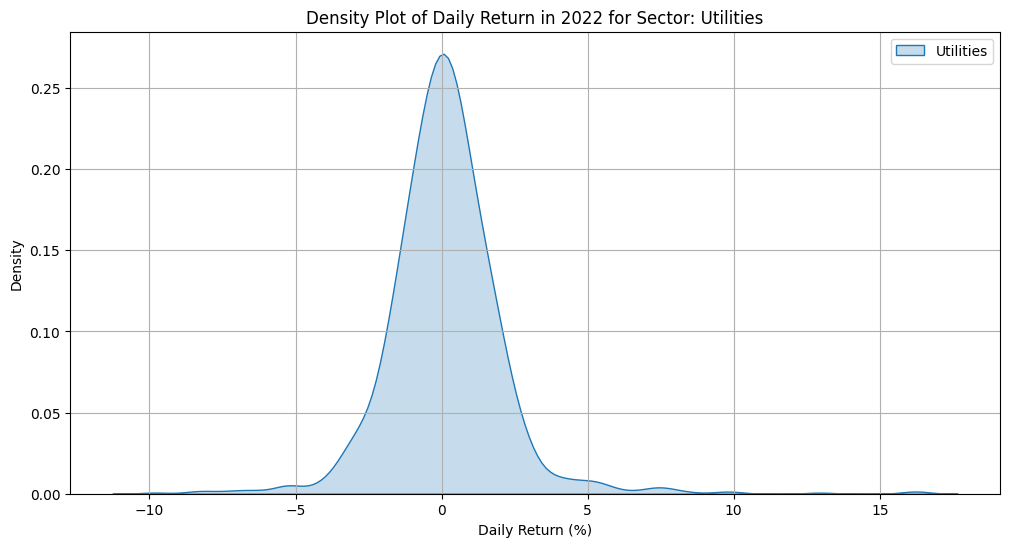

In [118]:
# Task 3: plot: for each sector, create a density plot of daily return of all the stocks in that sector in 2022

def sector_density_plot(data_last, data_sector, year):
    
    data = pd.merge(data_last, data_sector, on='ticker')
    data['date'] = pd.to_datetime(data['date'])

    # Filter the data based on the date range
    filtered_data = data[data['date'].dt.year == year].copy()

    # Calculate the daily return for each stock
    filtered_data['daily_return'] = filtered_data.groupby('ticker')['last'].pct_change()

    # Drop the NaN values
    filtered_data = filtered_data.dropna()

    # Multiply all the daily return by 100 for better visualization
    filtered_data['daily_return'] = filtered_data['daily_return'] * 100

    # Plot the density plot for each sector
    for sector in filtered_data['bics_sector'].unique():
        sector_data = filtered_data[filtered_data['bics_sector'] == sector]
        plt.figure(figsize=(12, 6))
        sns.kdeplot(sector_data['daily_return'], label=sector, fill=True)
        plt.title(f'Density Plot of Daily Return in {year} for Sector: {sector}')
        plt.xlabel('Daily Return (%)')
        plt.ylabel('Density')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

sector_density_plot(data_last, data_sector, 2022)